# PROJECT 2 - mini challenge 

Here are instructions for the next project (to be presented in two weeks - **7 minutes + 3 minutes questions**)

Main Goal : **Assign cluster labels to each provided sample**

During your presentation we will test how well your cluster labels fit with the ground truth labels corresponding to the winner using supervised clustering metric such as the [adjusted rand index](https://scikit-learn.org/stable/modules/clustering.html#rand-index). **Importantly**, you can estimate more than 2 clusters - see the definition of clustering metrics that use ground truth labels, testing for consistency of cluster assignments with ground truth labels. 

You are free to use combination of unsupervised learning techniques, such as : 
- Unsupervised feature selection as done above 
- Manual feature selection and feature engineering (i.e. combining features with a calculation that you define yourself)
- [Feature preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Decomposition techniques](https://scikit-learn.org/stable/modules/decomposition.html#decompositions) (may be used as a first step before clustering)
- [Any clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) implemented in sklearn.
- [Manifold learning](https://scikit-learn.org/stable/modules/manifold.html#manifold)

You can combine any of the techniques mentionned above, feel free to experiment. You can compare your different experiments using the unsupervised metrics we used previouly. 

In order to evaluate your solution, we ask you to provide us with the estimated cluster labels (numpy array named `labels` of shape `(1000,)`) by saving them with the following command : 

`np.savez_compressed('labels_binomeX.npz',labels=labels)`

And post the file in your binome channel just before the presentations start. 



FIrsto of all, we import the necessary librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold

Then, we load the dataset

In [3]:
data = pd.read_csv('features_unsupervised.csv', sep=';')

Finally we extract the feature from the dataset

In [4]:
features = data.values

Now that we have the features, we will apply variance thresholding to remove features with low variance using the VarianceThreshold class from scikit-learn

original features shape:
(1000, 66)
selected features shape
(1000, 43)
23 features were removed


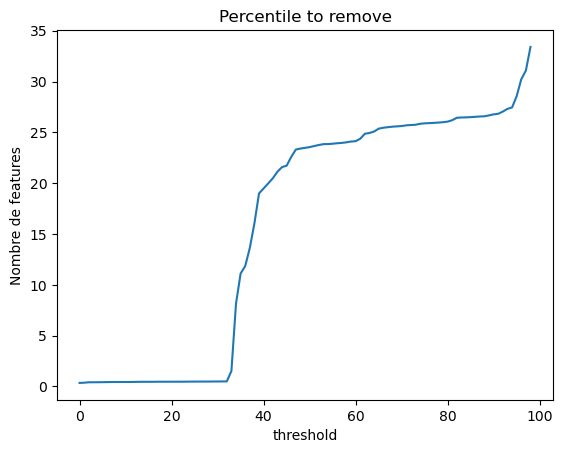

In [5]:
# print the original feartures shape
print('original features shape:')
print(data.shape)

# set the threshold and apply variance thresholding
thr = 0.95
selector = VarianceThreshold(threshold=thr)
data_new = selector.fit_transform(data)

# show the selected features shape
print('selected features shape')
print(data_new.shape)
print(f"{data.shape[1]-data_new.shape[1]} features were removed")

# plot the percentile to remove
variances = selector.variances_

liste = []

for i in range (1, 100):
    perc_toremove = i 
    thresh_perc = np.percentile(variances, perc_toremove)
    liste.append(thresh_perc)
plt.plot(liste)
plt.title('Percentile to remove')
plt.xlabel('threshold')
plt.ylabel('Nombre de features')
plt.show()

Let's now standardize the features. To do so, we use the StandardScaler from scikit-learn. This tool is a preprocessing step that helps us make sure that the features are on similar scales.

In [6]:
# Standardize the features 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

Next, we will apply a method for dimensionality reduction and data visualization : T-SNE. This method is specifically effective for preserving local structures and does a decent job in non-linear dataset.

c:\Users\marie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\marie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Number of Components: 2
         TSNE1      TSNE2
0    22.228867   3.918903
1    31.381300   3.759270
2     2.243284   2.986016
3     8.827006  -4.297447
4    18.653004   6.735698
..         ...        ...
995  -1.584967  -6.032334
996  31.658268  -0.750608
997 -27.843348  15.449965
998   9.189105  -5.993814
999   2.128548  13.476790

[1000 rows x 2 columns]


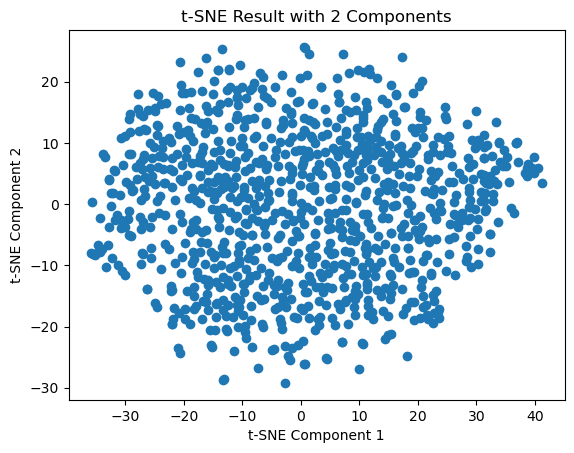

c:\Users\marie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\marie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Number of Components: 3
         TSNE1      TSNE2      TSNE3
0    30.538851  19.089989 -79.028542
1   -34.916210   8.772343 -78.991409
2    38.421093  31.241941  -6.617830
3   -48.320702 -14.733432  -7.431693
4    19.132729   1.177695 -67.906822
..         ...        ...        ...
995 -38.005512 -11.534721  17.126740
996 -23.828117  16.085739 -98.125778
997  67.643471  58.153099  40.549335
998 -20.758244 -38.547462 -15.458321
999   3.227564  43.490520 -21.724558

[1000 rows x 3 columns]


c:\Users\marie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\marie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [7]:
# Experiment T-SNE with different numbers of components
for n_components in [2, 3]:
    # Apply t-SNE with the chosen number of components
    tsne = TSNE(n_components=n_components)
    principal_components = tsne.fit_transform(features_standardized)

    # Create a DataFrame with the t-SNE components
    tsne_df = pd.DataFrame(data=principal_components, columns=[f'TSNE{i+1}' for i in range(n_components)])

    # Display the result
    print(f"Number of Components: {n_components}")
    print(tsne_df)

    # Plot the t-SNE result
    plt.scatter(tsne_df.iloc[:, 0], tsne_df.iloc[:, 1])
    plt.xlabel(f't-SNE Component 1')
    plt.ylabel(f't-SNE Component 2')
    plt.title(f't-SNE Result with {n_components} Components')
    plt.show()

We choose 2 as a number of components as the t-SNE in 2D tends to be more stable and less intensive compared to 3D making it faster to generate and analyze

In [ ]:
# generate the principal components
tsne = TSNE(n_components=2)
principal_components = tsne.fit_transform(features_standardized)

Now that we have processed the data, we will apply clustering algoriths. Before doing so, we will use the elbow method to determine the optimal number of clusters in the dataset.

In [8]:
#### ELBOW METHOD ####
inertia = []
cluster_range = range(1, 40)  # Adjust the range as needed
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)


# Plotting the Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

c:\Users\marie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


After 4 cluster the reduction in inertia is slower, we choose 3 for the number of cluster in our K-Means

    density(rat)   density(python)   distance(rat, python)  \
0       3.475423          2.307948                     9.0   
1       2.401837          2.202623                     1.0   
2       2.948456          2.659309                    11.0   
3       2.655862          2.352433                    13.0   
4       2.204104          2.645298                     3.0   

    density(cheese_0)   distance(rat, cheese_0)   distance(python, cheese_0)  \
0            2.266966                       1.0                          8.0   
1            2.091537                       3.0                          4.0   
2            2.474181                       3.0                         14.0   
3            2.355235                       2.0                         11.0   
4            3.629737                       5.0                          8.0   

    density(cheese_1)   distance(rat, cheese_1)   distance(python, cheese_1)  \
0            2.016979                       4.0                   

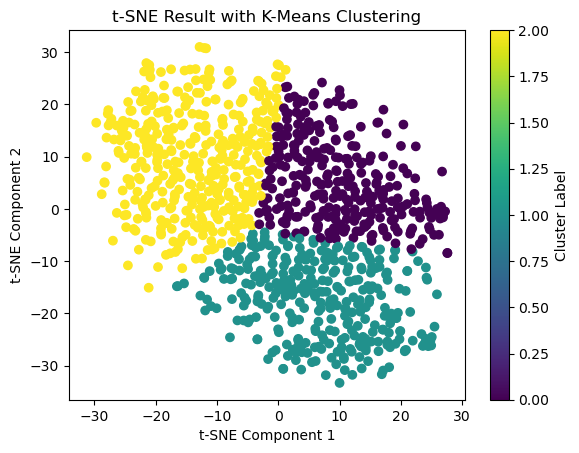

In [9]:
# Set the number of clusters determined by the Elbow Method
optimal_clusters = 3

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(principal_components)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Attach the cluster labels to the original dataframe
data['cluster_label'] = cluster_labels

# Display the first few entries of your dataframe with the cluster labels
print(data.head())

principal_df = pd.DataFrame(data=principal_components, columns=[f'TSNE{i+1}' for i in range(2)])

# Plot the t-SNE result with color-coded clusters
plt.scatter(principal_df['TSNE1'], principal_df['TSNE2'], c=cluster_labels, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Result with K-Means Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

np.savez_compressed('labels_binome4.npz',labels=cluster_labels)


Let's do a silhouette analysis to evaluate the separation distance between the resulting clusters. A silhouette score close to +1 indicates a good separation.

The average silhouette_score is: 0.39086437225341797


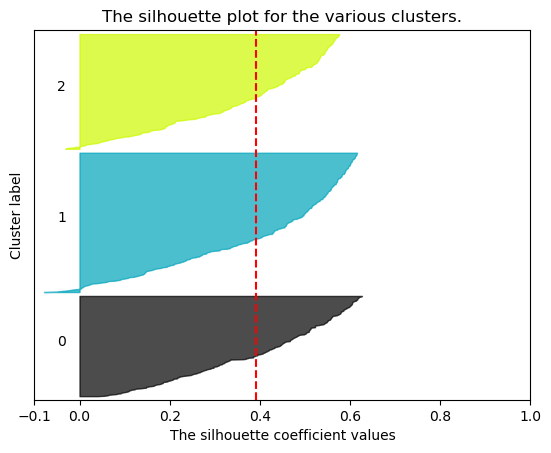

In [101]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

def plot_silhouette(principal_components,cluster_labels):
    # with `principal_components` and `cluster_labels`
    silhouette_avg = silhouette_score(principal_components, cluster_labels)
    print(f"The average silhouette_score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(principal_components, cluster_labels)

    # Create a silhouette plot
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(principal_components) + (optimal_clusters + 1) * 10])

    y_lower = 10
    for i in range(optimal_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / optimal_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

plot_silhouette(principal_components,cluster_labels)

The average silhouette score for your clusters is close to 0.4. 

So let's try other methods to see if we can get better results:

First, we try the Agglomerative Clustering

The average silhouette_score is: 0.30154934525489807


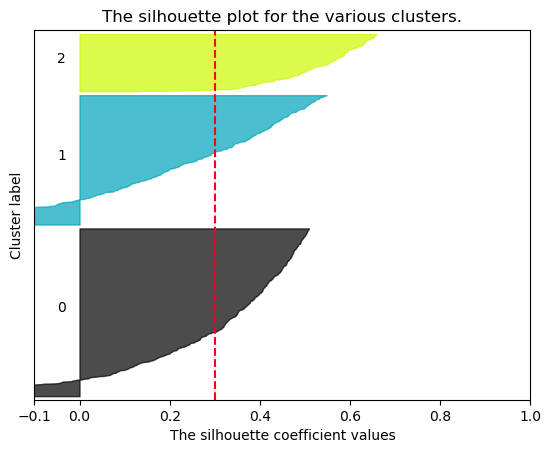

In [104]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming you have already computed principal components using t-SNE
tsne_df = pd.DataFrame(data=principal_components, columns=['TSNE1', 'TSNE2'])

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
cluster_labels = agglomerative.fit_predict(principal_components)

# Visualize the clusters in 2D t-SNE space
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=cluster_labels, cmap='viridis')
plt.title('Data points in 2D t-SNE space colored by Agglomerative Clustering label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

plot_silhouette(principal_components,cluster_labels)

The silhouette score is even lower so we will try another method of clustering which is Birch

The average silhouette_score is: 0.3082263767719269


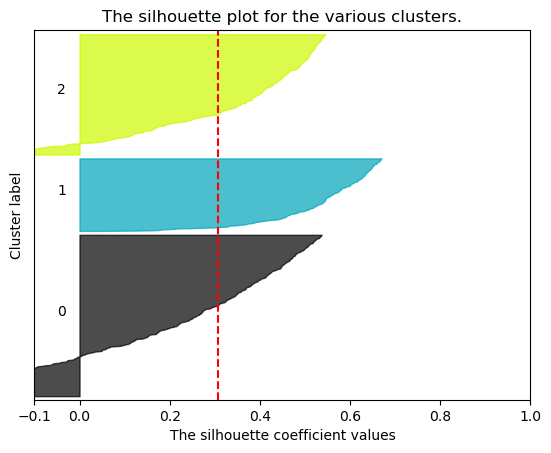

In [105]:
from sklearn.cluster import Birch
# Assuming you have already computed principal components using t-SNE
tsne_df = pd.DataFrame(data=principal_components, columns=['TSNE1', 'TSNE2'])

# Apply BIRCH clustering
birch = Birch(n_clusters=3)
cluster_labels = birch.fit_predict(principal_components)

# Visualize the clusters in 2D t-SNE space
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=cluster_labels, cmap='viridis')
plt.title('Data points in 2D t-SNE space colored by BIRCH label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

plot_silhouette(principal_components,cluster_labels)

# To go further: semi-supervised Learning on PyRat 

In some situations, data labeling can be pretty expensive, although it is available in large quantity. This can occur when human expertise is required, or when particular resources are needed to determine the label, among other examples. In these cases, one can be interested in what is commonly called *semi-supervised learning*. This paradigm is halfway between supervised and unsupervised learning, and typically consists in attributing labels to unlabeled samples, given a low count of labeled samples of the same classes. Semi-supervised learning can be used to provide a pseudo-label to the unlabeled samples, but also to get better performance than unsupervised learning. Indeed, knowledge of a few labels gives some information that can be exploited.

A way to perform semi-supervised clustering is to use a *nearest class mean* (NCM) classifier. Such a classifier computes a barycenter of the labeled samples of a particular class. Then, unsupervised samples are attributed the label of the closest barycenter. Those barycenters can be computed either directly as a mean of the values of all labeled samples per feature, or on a transformed representation of the samples. Such a transformation can be obtained for instance in the middle layer of an autoencoder.

Consider the following information:
- Rows 20, 140, 257, 394 and 451 in 'features_unsupervised.csv' are of class 0
- Rows 29, 258, 369, 500 and 580 in 'features_unsupervised.csv' are of class 1

Now program a NCM to give labels to all unlabeled samples.

In [ ]:
def nearest_class_mean(train_features, classes, test_features):

    """Nearest class mean classifier
    
    Args:
        train_features (numpy.ndarray): A matrix of training features (n_samples, n_features)
        classes (numpy.array): An array of class labels for each training sample (n_samples,)
        test_features (numpy.ndarray): A matrix of test features (n_samples, n_features)
        
    Returns:
        numpy.ndarray: A list of predicted class labels for each test sample (n_samples,)
    """
    
    #### TO BE COMPLETED

In [ ]:
# Prepare information
labels_1 = [20, 140, 257, 394, 451]
labels_2 = [29, 258, 369, 500, 580]
features_unsupervised = features_unsupervised.astype(float)
train_samples = features_unsupervised.values[labels_1 + labels_2, :]
test_samples = features_unsupervised.values[[i for i in range(features_unsupervised.shape[0]) if i not in labels_1 + labels_2], :]
classes = np.array([0] * len(labels_1) + [1] * len(labels_2))

# Call the nearest class mean classifier
result = nearest_class_mean(train_samples, classes, test_samples)
print(result)

